Avem un set de date în care dorim să prezicem veniturile lunare ale unei persoane în funcţie de numărul de ani de
experienţă profesională. Datele conţin informaţii despre experienţa profesională 𝑥 şi veniturile observate𝑦. Presupunem
că relaţia dintre acestea este liniară, dar dorim să utilizăm o abordare bayesiană pentru a estima parametrii modelului,
luând în considerare incertitudinea asociată.

a) Generaţi 100 de observaţii, cu ani de experienţă între 0 şi 20 (aleator), iar venitul lunar folosind un
model liniar cu zgomot adăugat.

b) Cu ajutorul PyMC, estimaţi parametrii folosind un model de regresie liniară Bayesiană. Corespund aceştia cu cei
aleşi de voi la punctul a)?

In [34]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
experienta_obs = np.random.randint(0, 21, 100)

alpha_initial = 500
beta_initial = 2
eps_initial = np.random.normal(0, 0.5, 100)

venit_prezis = alpha_initial + beta_initial * experienta_obs
venit = venit_prezis + eps_initial

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=alpha_initial, sigma=200)
    beta = pm.Normal('beta', mu=beta_initial, sigma=1)
    epsilon = pm.HalfCauchy('epsilon', 100)
    mu = pm.Deterministic('mu', alpha + beta * experienta_obs)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=venit)
    
    # Sampling
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 223 seconds.


  alpha ~ Normal(500, 200)
   beta ~ Normal(2, 1)
epsilon ~ HalfCauchy(0, 100)
     mu ~ Deterministic(f(alpha, beta))
 y_pred ~ Normal(mu, epsilon)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'epsilon'}>,
        <Axes: title={'center': 'epsilon'}>]], dtype=object)

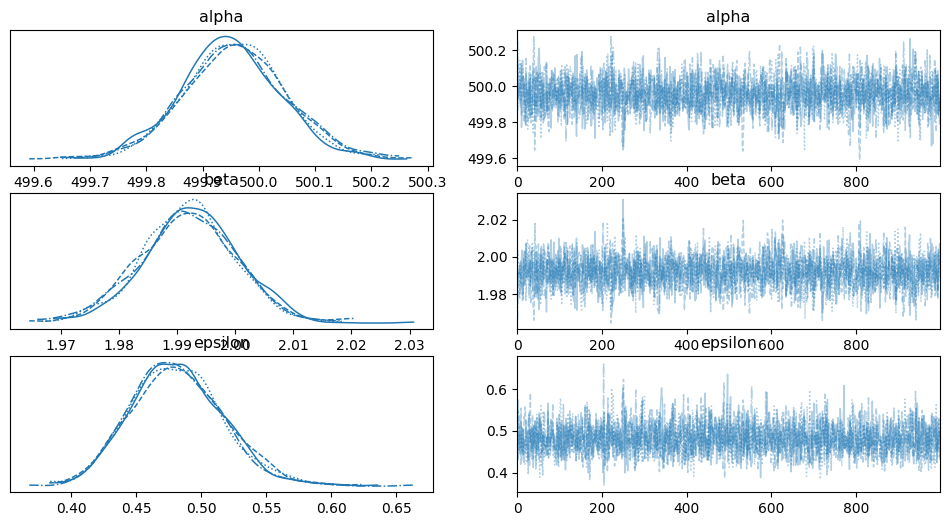

In [31]:
az.plot_trace(trace, var_names=['alpha', 'beta', 'epsilon'])

<Axes: xlabel='alpha', ylabel='beta'>

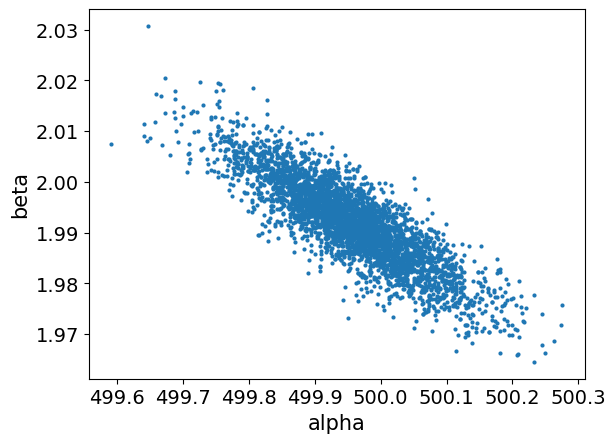

In [24]:
az.plot_pair(trace, var_names=['alpha', 'beta'])

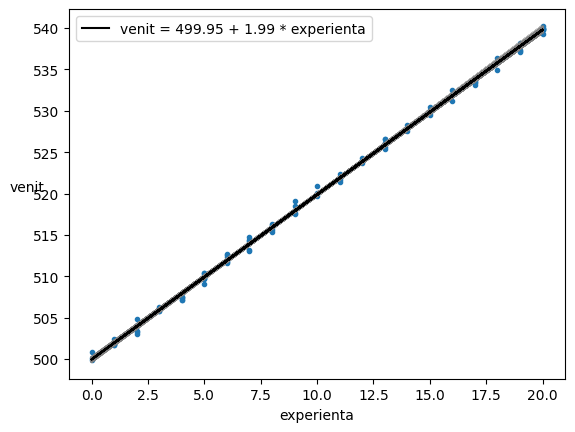

In [ ]:
plt.plot(experienta_obs, venit, 'C0.')
posterior = trace.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior['alpha'].mean().item()
beta_m = posterior['beta'].mean().item()
draws = range(0, posterior.samples.size, 10)

plt.plot(experienta_obs, posterior['alpha'][draws].values + posterior['beta'][draws].values * experienta_obs[:,None], c='gray', alpha=0.5)
plt.plot(experienta_obs, alpha_m + beta_m * experienta_obs, c='k',
label=f'venit = {alpha_m:.2f} + {beta_m:.2f} * experienta')
plt.xlabel('experienta')
plt.ylabel('venit', rotation=0)
plt.legend()